In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./dataset/train.csv', index_col=0)
print('Train data shape:', train.shape)

Train data shape: (614, 12)


In [3]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train['Loan_Status'] = train.Loan_Status.map(lambda x:1 if x=='Y' else 0)

In [5]:
train.shape

(614, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 62.4+ KB


In [7]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
Categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Real_valued = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Categorical 

## Target

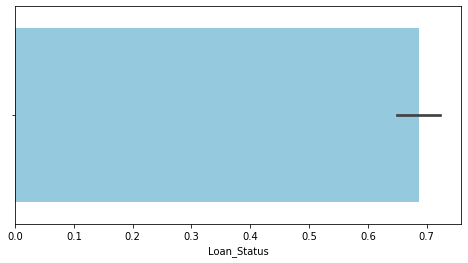

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(data=train, x='Loan_Status', color='skyblue')

## Features

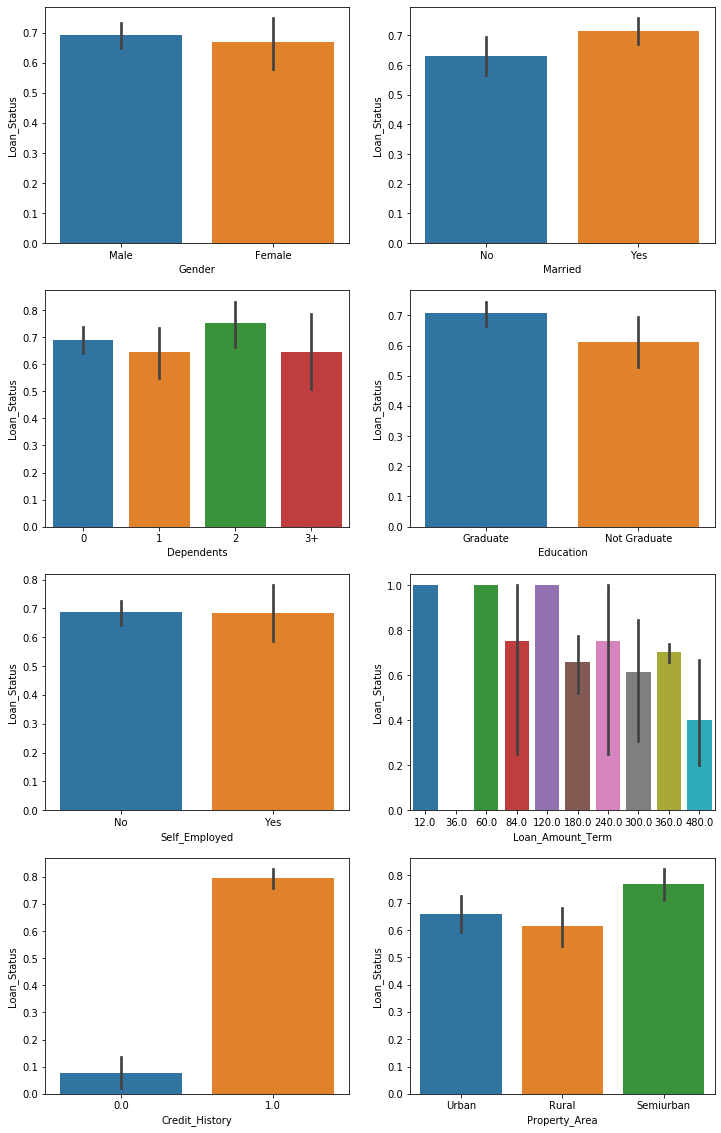

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(12,20))
for ax, cat in zip(axs.flatten(), Categorical[:-1]):
    sns.barplot(data=train, x=cat, y='Loan_Status', ax=ax)

# Real Valued

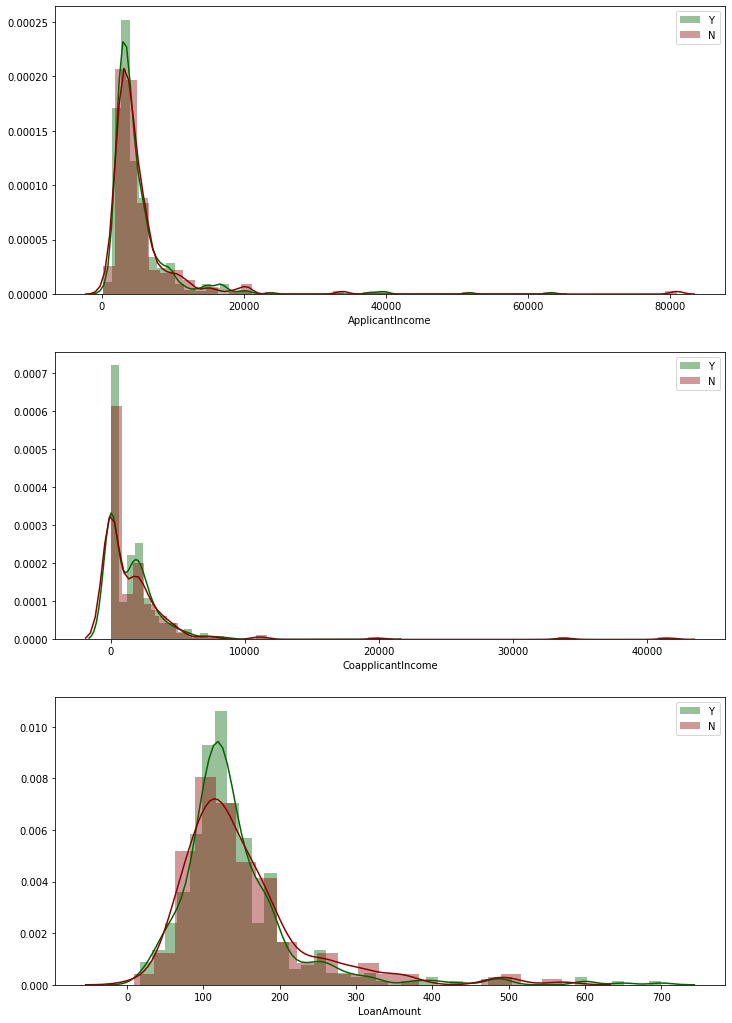

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

for ax, var in zip(axs, Real_valued):
    sns.distplot(train[train.Loan_Status == 1][var].dropna(), color='darkgreen', ax=ax, label='Y')
    sns.distplot(train[train.Loan_Status == 0][var].dropna(), color='darkred', ax=ax, label='N')
    ax.legend()

# Corelation Heatmap

In [12]:
#Encoding categorical features values to integers
catg_map = {}
for catg in ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']:
    unq = train[catg].unique()
    catg_map[catg] = {key:val for val, key in enumerate(unq)}

    train[catg] = train[catg].map(catg_map[catg])

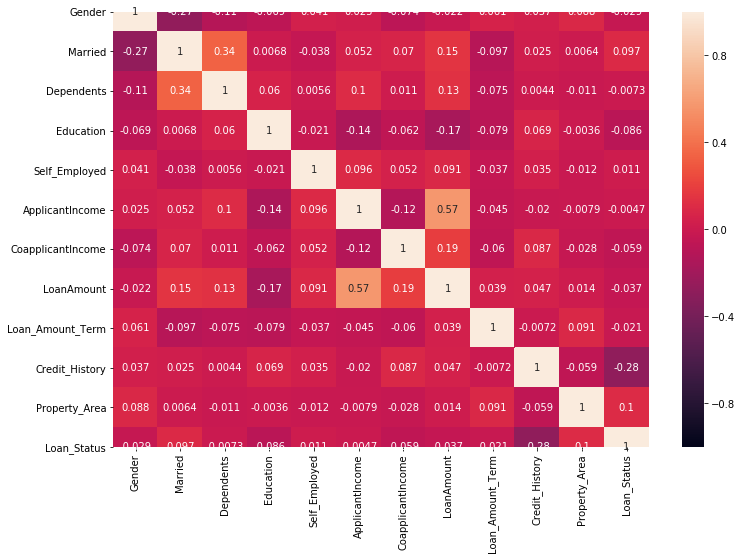

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
plt.show()